In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [2]:
df = pd.read_csv('combine_methods_ratio.csv')
df_tweets_stats = df.copy()
df_tweets_stats.loc[df_tweets_stats['party'] == 'AFD', 'party'] = 'AfD'

df_total_tweets = df_tweets_stats.drop(['screen_name', 'covid_tweets'], axis='columns')

df_total_tweets.rename(columns={'total_tweets':'tweets'}, inplace = True)
df_sum_total_tweets = df_total_tweets[['party','tweets']].groupby(['party']).sum()
df_total_tweets['tweet_type'] = 'Total Tweets'
df_sum_total_tweets['tweet_type'] = 'Total Tweets'

df_covid_tweets = df_tweets_stats.drop(['screen_name', 'total_tweets'], axis='columns')
df_covid_tweets.rename(columns={'covid_tweets':'tweets'}, inplace = True)
df_sum_covid_tweets = df_covid_tweets[['party','tweets']].groupby(['party']).sum()
df_covid_tweets['tweet_type'] = 'Covid Tweets'
df_sum_covid_tweets['tweet_type'] = 'Covid Tweets'

df_combine_tweet_types = df_total_tweets.append(df_covid_tweets)
df_combine_tweet_types_sum = df_sum_total_tweets.append(df_sum_covid_tweets)
df_combine_tweet_types_sum.reset_index(inplace=True)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

# Number of Total Covid-Tweets per Party

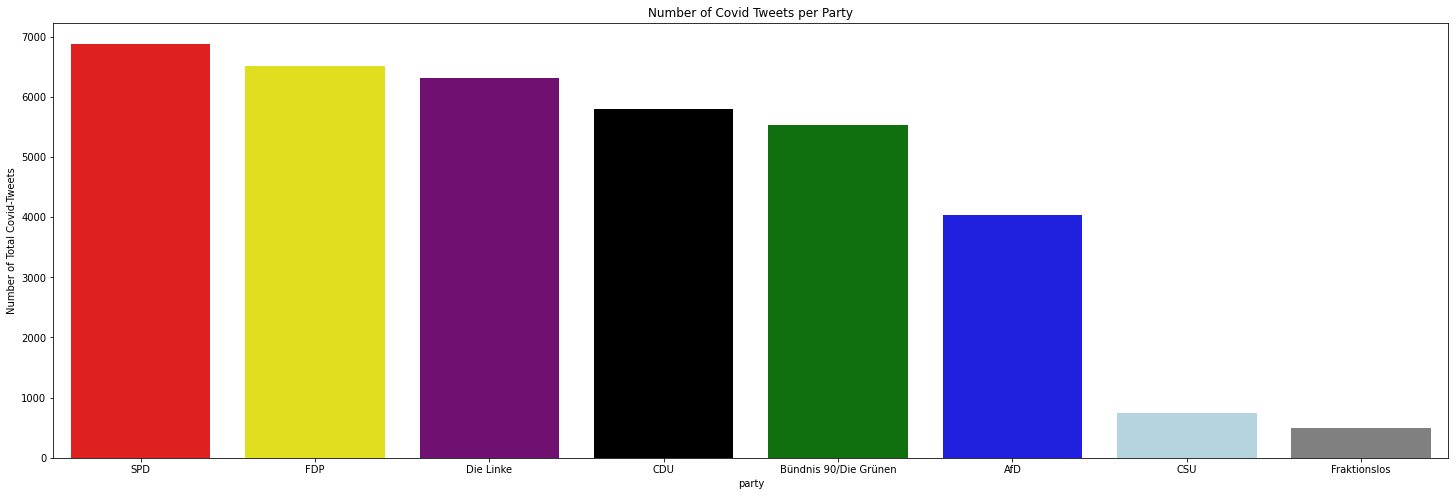

In [3]:
df_covid_tweets_per_party = df_covid_tweets[['party','tweets']].groupby(['party']).sum()
df_covid_tweets_per_party.reset_index(inplace=True)
df_covid_tweets_per_party = df_covid_tweets_per_party.rename(columns={'tweets':'covid_tweets_per_party'})
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_per_party, x='party', y='covid_tweets_per_party',order=df_covid_tweets_per_party.sort_values('covid_tweets_per_party', ascending=False).party, palette=party_colors)
chart.set(ylabel='Number of Total Covid-Tweets', title='Number of Covid Tweets per Party')
plt.show()

# Number of Mean Covid-Tweets per Party

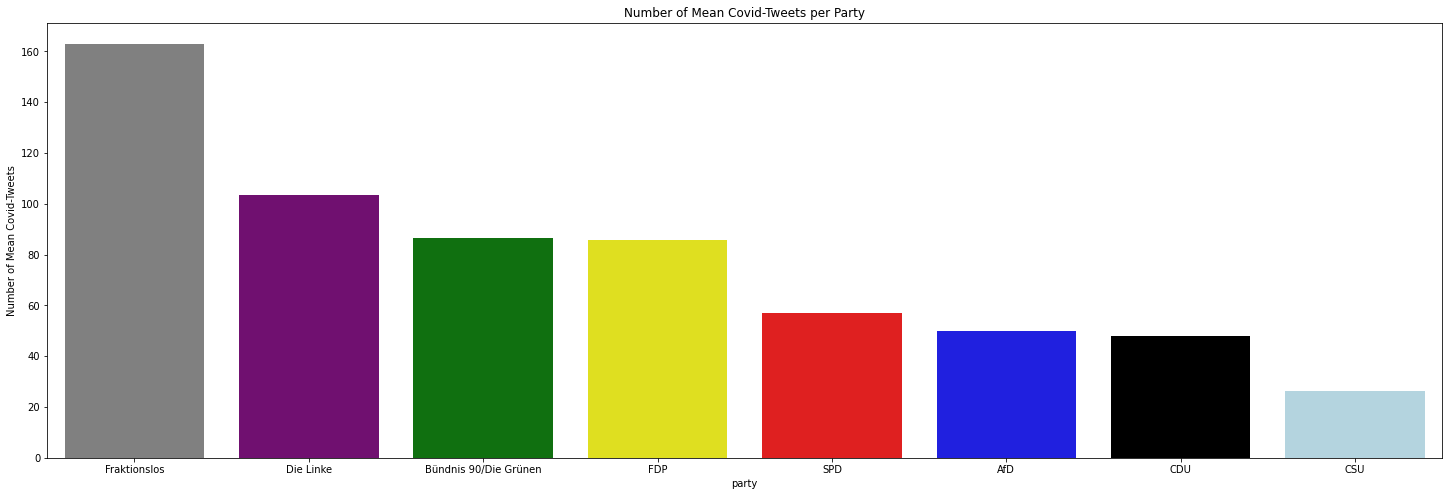

In [4]:
df_covid_tweets_per_party = df_covid_tweets[['party','tweets']].groupby(['party']).mean()
df_covid_tweets_per_party.reset_index(inplace=True)
df_covid_tweets_per_party = df_covid_tweets_per_party.rename(columns={'tweets':'covid_tweets_per_party'})
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_per_party, x='party', y='covid_tweets_per_party', order=df_covid_tweets_per_party.sort_values('covid_tweets_per_party', ascending=False).party, palette=party_colors)
chart.set(ylabel='Number of Mean Covid-Tweets', title='Number of Mean Covid-Tweets per Party')
plt.show()

# Number of Median Covid-Tweets per Party

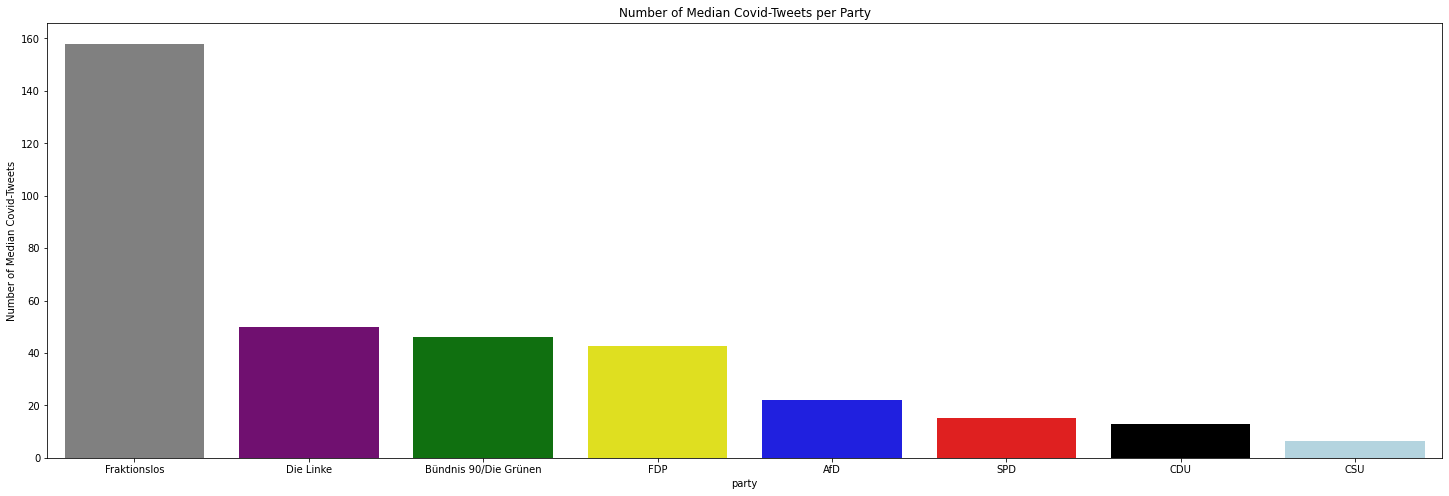

In [5]:
df_covid_tweets_per_party = df_covid_tweets[['party','tweets']].groupby(['party']).median()
df_covid_tweets_per_party.reset_index(inplace=True)
df_covid_tweets_per_party = df_covid_tweets_per_party.rename(columns={'tweets':'covid_tweets_per_party'})
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_per_party, x='party', y='covid_tweets_per_party',order=df_covid_tweets_per_party.sort_values('covid_tweets_per_party', ascending=False).party, palette=party_colors)
chart.set(ylabel='Number of Median Covid-Tweets', title='Number of Median Covid-Tweets per Party')
plt.show()

# Number of Total Tweets/ Covid-Tweets per Party (Barchart)

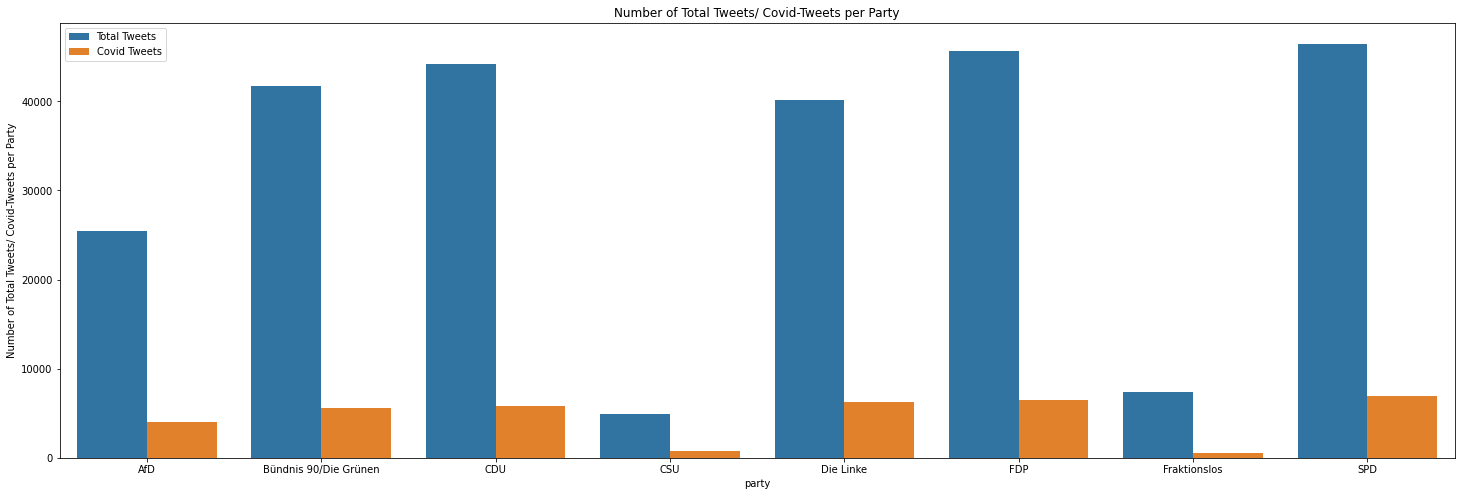

In [6]:
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_combine_tweet_types_sum, x='party', y='tweets', hue='tweet_type')
chart.set(ylabel='Number of Total Tweets/ Covid-Tweets per Party', title='Number of Total Tweets/ Covid-Tweets per Party')
plt.legend(loc='best')
plt.show()



# Number of Covid-Tweets per Party (Boxplot with outliers)

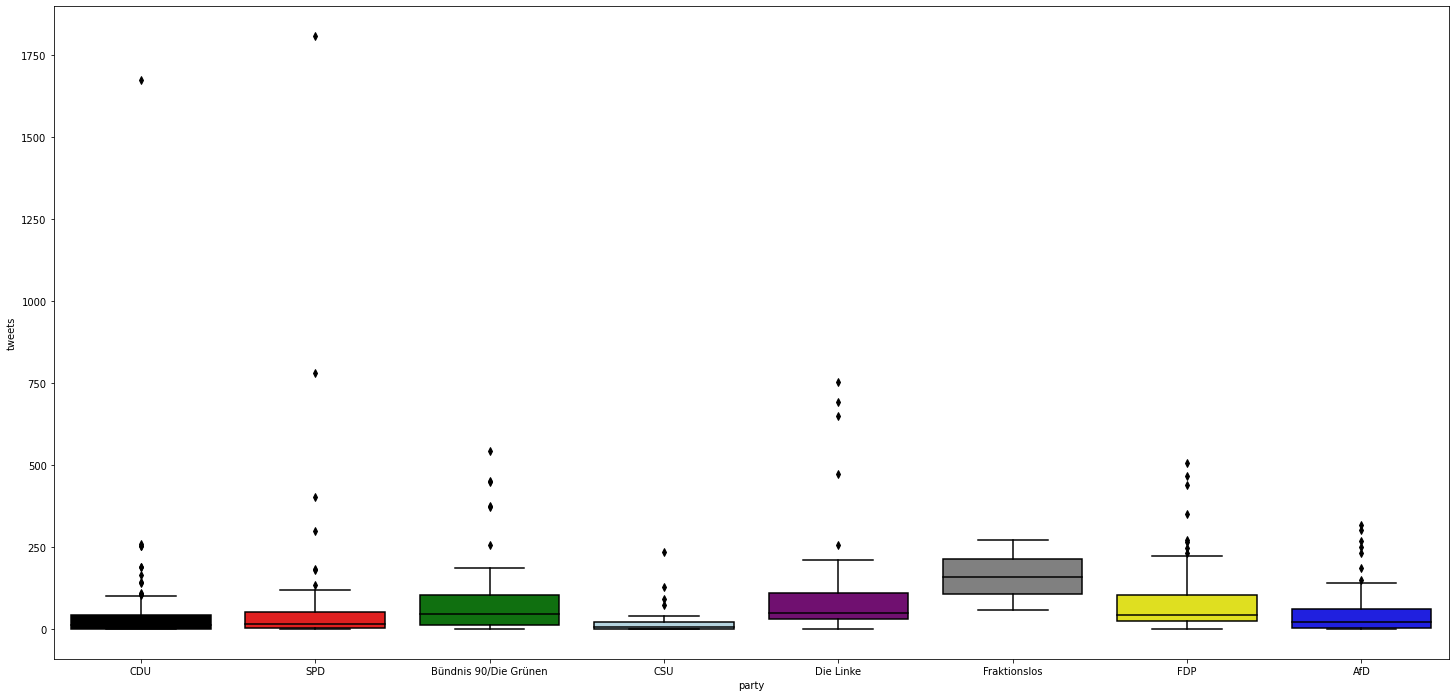

In [10]:
plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=df_covid_tweets, x='party', y='tweets', palette=party_colors)
plt.show()


# Number of Covid-Tweets per Party (Boxplot without outliers)

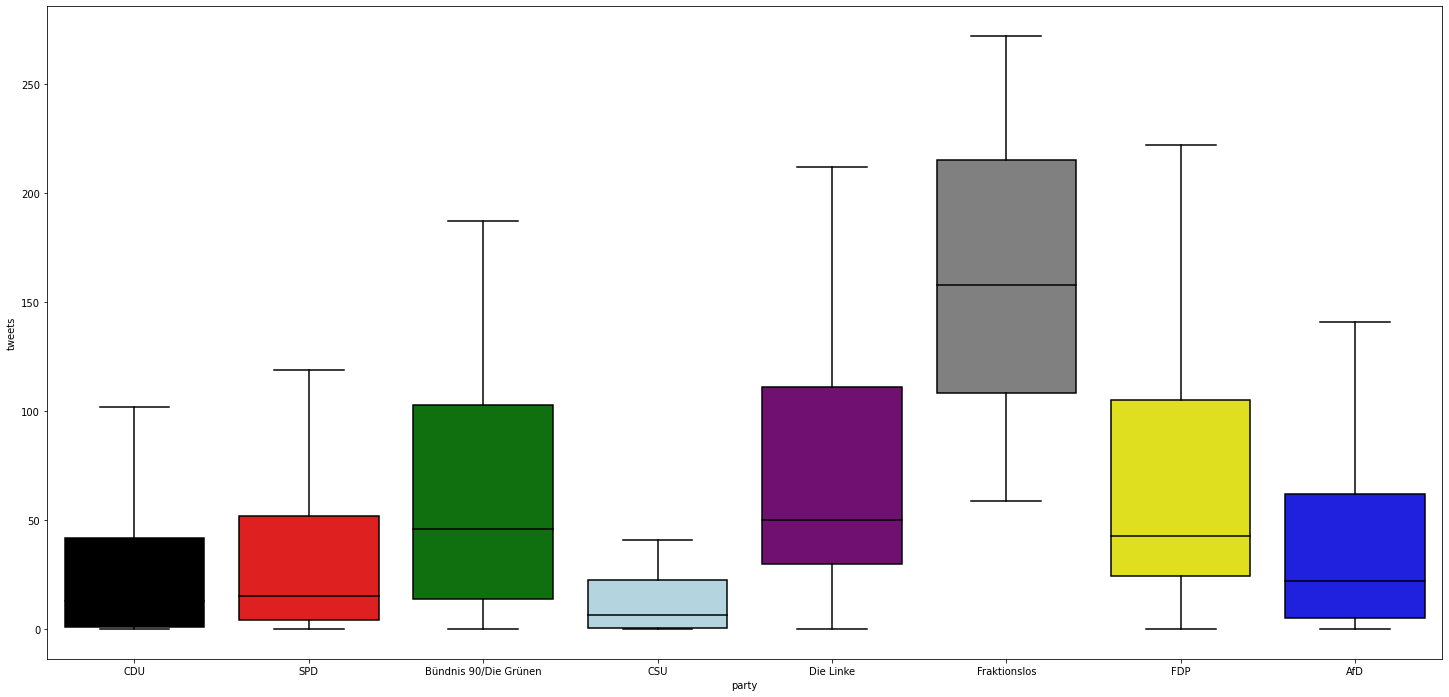

In [11]:
plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=df_covid_tweets, x='party', y='tweets', showfliers = False, palette=party_colors)
plt.show()


# Number of Top Tweeters per Party

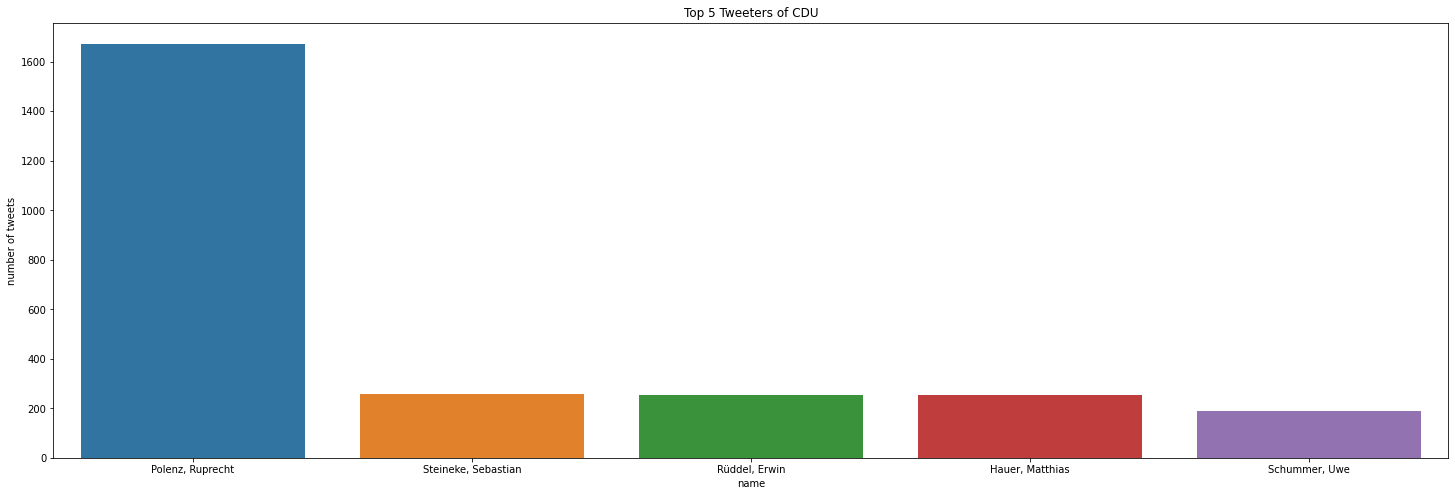

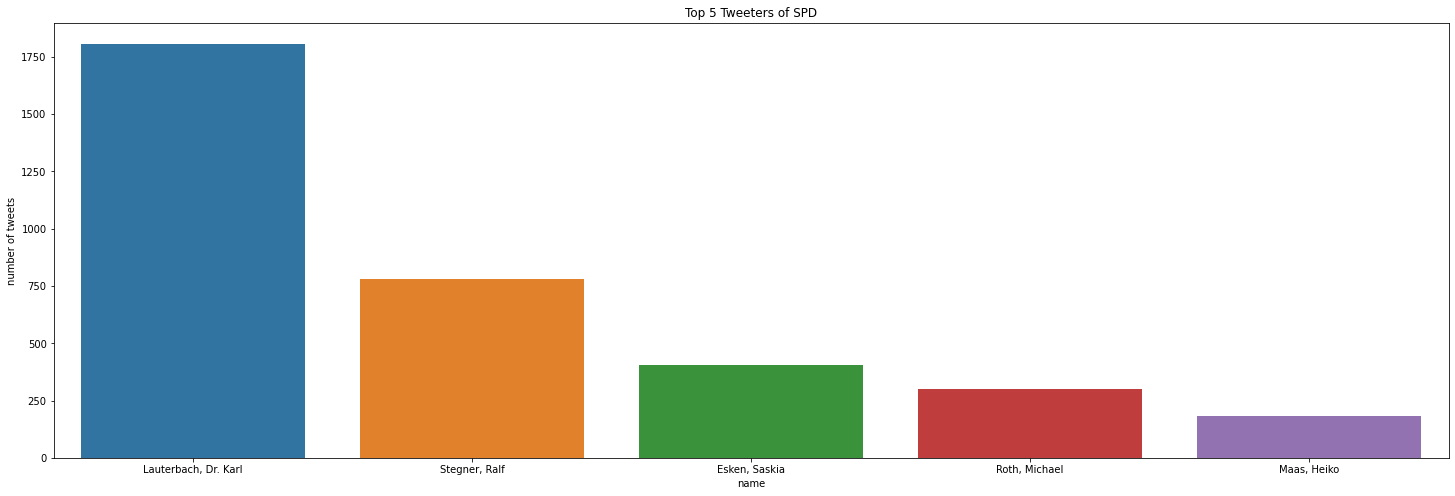

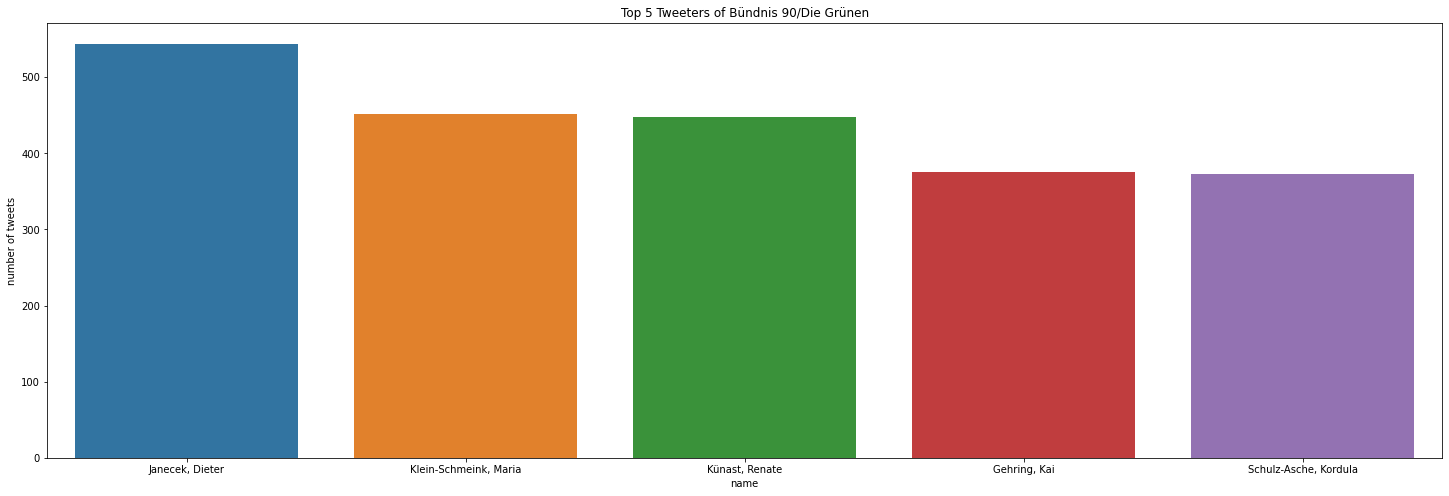

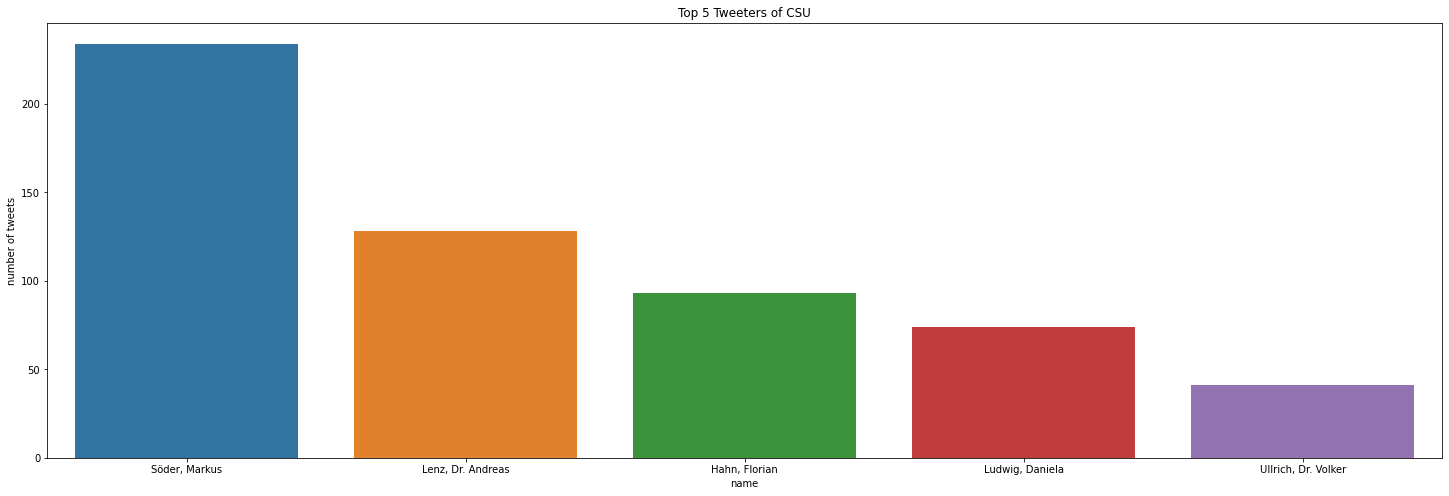

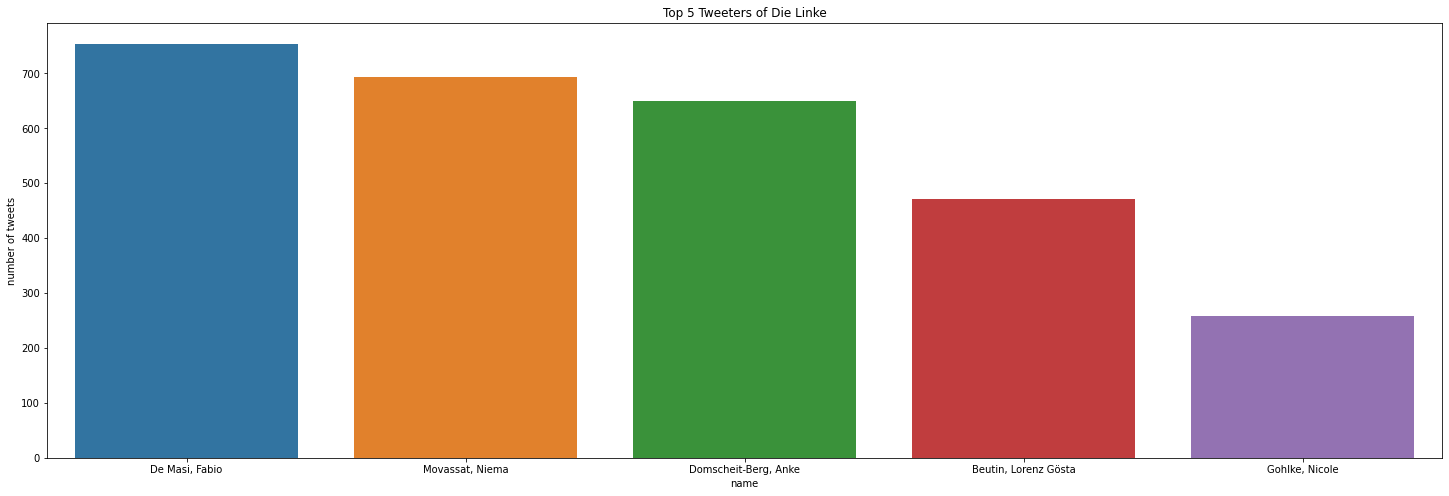

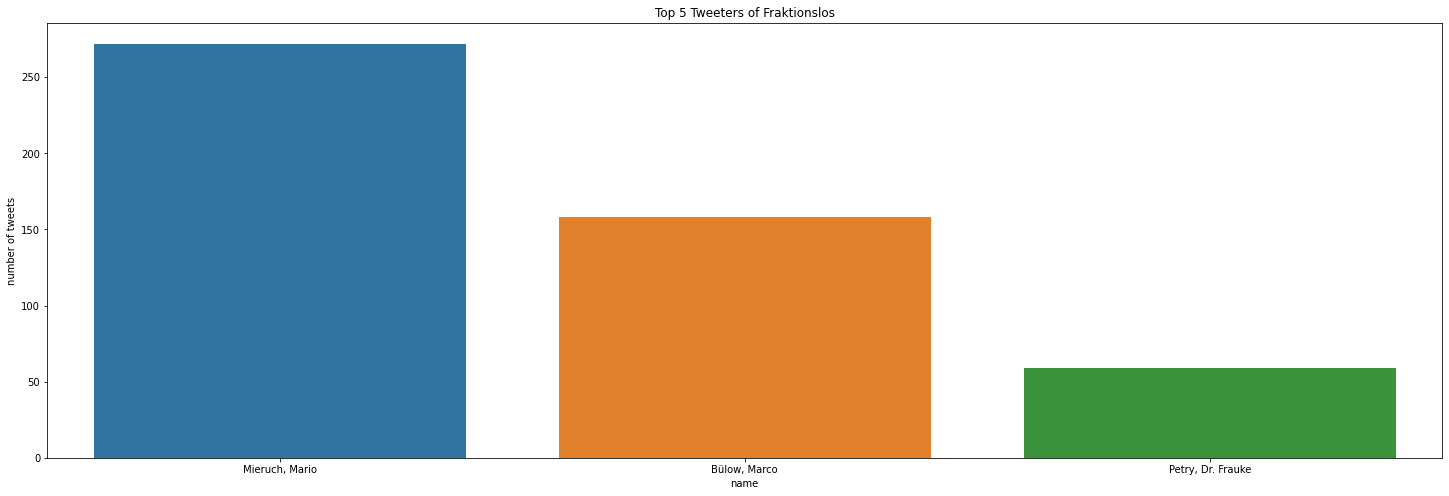

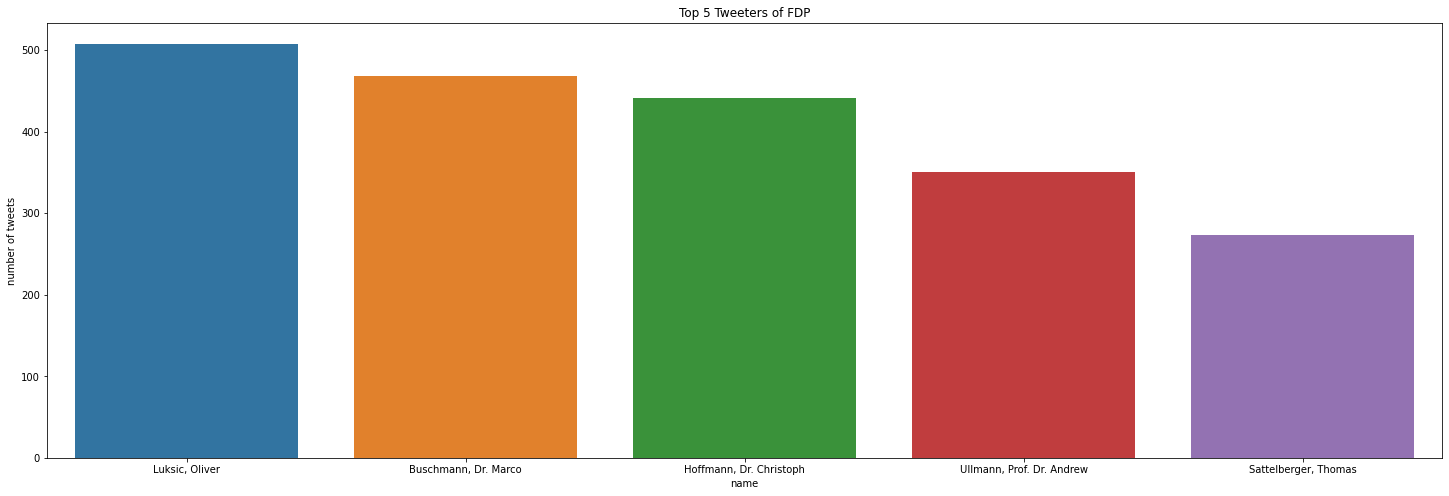

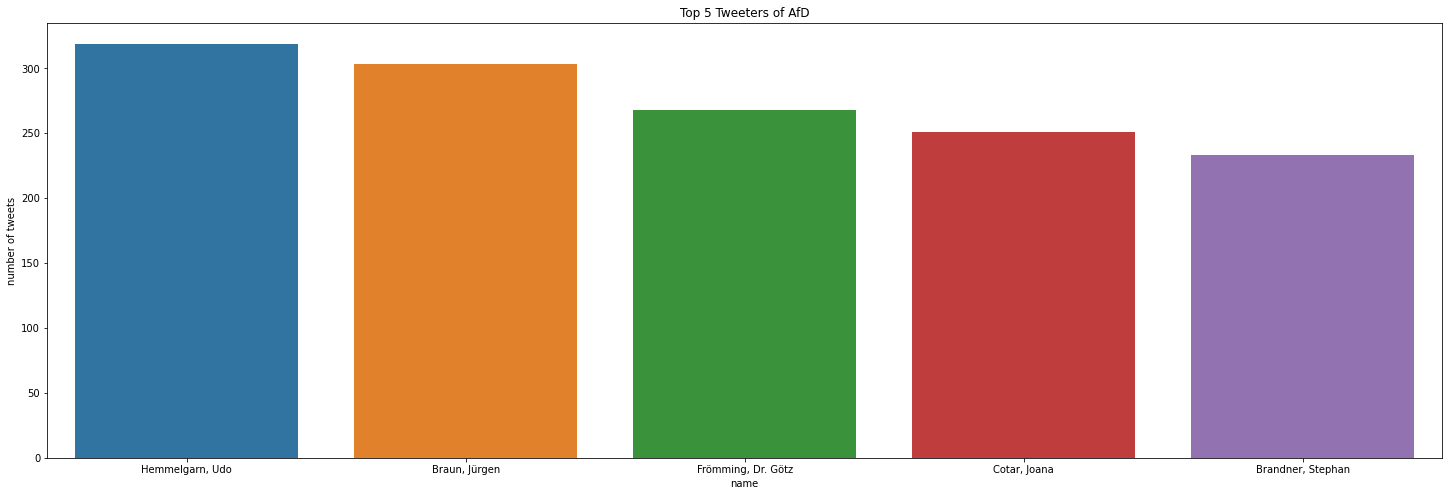

In [9]:
number_of_top_tweeters = 5
parties = df_covid_tweets['party'].unique()
for p in parties:
    politicians_per_party = df_covid_tweets[df_covid_tweets['party'] == p].sort_values(by='tweets', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='tweets')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p}')
    plt.show()